In [1]:
import pandas as pd
import numpy as np

In [2]:
books = pd.read_csv('book_rec.csv', encoding='latin-1')
books.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [3]:
# Dropping unnecessary column[0] 
books.drop([books.columns[0]], inplace=True, axis=1)
books.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [5]:
# No. of Ratings given by a particular User
books['User.ID'].value_counts()

3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
969         1
967         1
965         1
951         1
162129      1
Name: User.ID, Length: 2182, dtype: int64

In [6]:
# No. of unique users
books['User.ID'].nunique()

2182

In [7]:
# No. of unique books
books['Book.Title'].nunique()

9659

In [8]:
# No. of readers and rated the particular book
books['Book.Title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book.Title, Length: 9659, dtype: int64

In [9]:
# Entire Duplicate rows
books[books.duplicated(keep=False)]

,User.ID,Book.Title,Book.Rating
5050,2152,Le nouveau soleil de Teur,7
5051,2152,Le nouveau soleil de Teur,7
7045,3757,The Magician's Tale,7
7439,3757,The Magician's Tale,7


In [10]:
# Drop duplicate rows
books.drop_duplicates(inplace=True)

In [11]:
# Checking again for duplicate entries
books[books.duplicated(keep=False)]

,User.ID,Book.Title,Book.Rating


In [12]:
# Checking for the total count | It reduced from 10000 to 9998
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      9998 non-null   int64 
 1   Book.Title   9998 non-null   object
 2   Book.Rating  9998 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 312.4+ KB


In [13]:
# Cannot create pivot table because of following error 
# ValueError: Index contains duplicate entries, cannot reshape
# Hence checked for the duplicate entries for combination [User.ID and Book.Title] i.e. same user has given rating for the 
# same book two times
books[books[['User.ID','Book.Title']].duplicated(keep=False)]

,User.ID,Book.Title,Book.Rating
1975,278418,White Oleander : A Novel,10
2001,278418,White Oleander : A Novel,5
3786,1211,Black House,8
3792,1211,Black House,9
4730,2033,The First Time,7
4745,2033,The First Time,2
5218,2276,In the Beauty of the Lilies,9
5219,2276,In the Beauty of the Lilies,10
9778,162052,Rose,4
9945,162052,Rose,8


In [14]:
# Keeping the last rating entry and dropping other values
books.drop_duplicates(subset=['User.ID', 'Book.Title'], keep='last', inplace=True)

In [15]:
# Checking again for the duplicates
books[books[['User.ID','Book.Title']].duplicated(keep=False)]

,User.ID,Book.Title,Book.Rating


In [16]:
# Checking for the total records | Entries reduced from 9998 to 9993 (5 duplicates removed)
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      9993 non-null   int64 
 1   Book.Title   9993 non-null   object
 2   Book.Rating  9993 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 312.3+ KB


In [17]:
# Sorting the values of User.Id but it do not alter the dataframe. But while creating the pivot table, index of userids are sorted
books.sort_values('User.ID')

,User.ID,Book.Title,Book.Rating
2399,8,Ancient Celtic Romances,5
2405,8,The Art Of Celtia,7
2404,8,The Celts Activity Book,6
2400,8,The Western way: A practical guide to the West...,5
2402,8,Truckers,5
...,...,...,...
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2396,278854,Blast From the Past,7


In [18]:
# To check that sort methid used above do not alter the order of original dataframe
books.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [19]:
# Please Note: UserIds used for index of rows are sorted while creating pivot table. Hence, when creating paiwise cosine matrix, 
# we would have to sort the userids when assigninig rows and column labels as userids.
user_book_df = books.pivot(index='User.ID', columns='Book.Title', values='Book.Rating')
user_book_df.head()


Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Checking the shape of created dataframe 
# 2182 - # of unique users
# 9659 - # of unique books
user_book_df.shape


(2182, 9659)

In [21]:
# Replacing NAN with 0 
user_book_df.fillna(0, inplace=True)
user_book_df.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation


### Cosine Similarity

It shows the cosine of the angle of two vectors projected in a multidimensional space. It shows how two entities are similar to each other whether entities are users, books, movies or documents.

Its range is from 0 to 1. Higher the value, entities are more similar.

Formula to calculate cosine similarity:

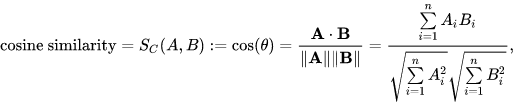


In [23]:
# cosine similarity is 1-cosine distance 
# this matrix contains the similarity scores between each pair of users.. Higher the score, more similar are the users.. 
cos_sim = 1- pairwise_distances(user_book_df, metric='cosine')
cos_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
# when converting cosine matrix to dataframe, this is 2182*2182 (user-user) based similarities. It gives similarity scores 
# between 1 and 0. But these are pure indices of the matrix. We have to map them to actual userid to have a better understanding
cos_sim_df = pd.DataFrame(cos_sim)
cos_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# As explained above, since user_book_df table is created by using sorted userId. We have to sort the userId from the 
# original dataframe. 
cos_sim_df.index = np.sort(books['User.ID'].unique())
cos_sim_df.columns = np.sort(books['User.ID'].unique())
cos_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# diagonals represent same users similarity scores, hence it is 1. And it will return as the most similar user. 
# Hence to ignore them in our analysis, we are replacing the diagonal values as 0.
np.fill_diagonal(cos_sim, 0)
cos_sim_df.head()

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
cos_sim_df.shape

(2182, 2182)

In [28]:
# idxmax gives the (requested axis=1) column label containing highest value in each row 
# ideally it gives the same result for (axis=0), since matrix is same above or below the diagonal | Check below

cos_sim_df.idxmax(axis=1)[0:20]

8          8
9          8
10         8
12         8
14         8
16         8
17         8
19    278418
22         8
26         8
32         8
39         8
42         8
44         8
51      3757
53      1996
56         8
64         8
67         8
69         8
dtype: int64

In [29]:
cos_sim_df.idxmax(axis=0)[0:20]

8          8
9          8
10         8
12         8
14         8
16         8
17         8
19    278418
22         8
26         8
32         8
39         8
42         8
44         8
51      3757
53      1996
56         8
64         8
67         8
69         8
dtype: int64

In [30]:
# returning the maximum value over the requested axis. In this case, both axes will return the same result
cos_sim_df.max(axis=0)

8         0.000000
9         0.000000
10        0.000000
12        0.000000
14        0.000000
            ...   
278846    0.000000
278849    0.000000
278851    0.023464
278852    0.000000
278854    0.000000
Length: 2182, dtype: float64

In [31]:
# Creating a new dataframe containing user_id(index), most similar user id, and the corresponding cosine similarity score
# Most_Similar_User is retrieved by the idxmax (index of the max value in each row, which is eventually the user id)
# Score = max value
similar_users_df = pd.DataFrame(cos_sim_df.idxmax(axis=1), columns=['Most_Similar_User'])
similar_users_df['score'] = cos_sim_df.max()
similar_users_df.head(20)


,Most_Similar_User,score
8,8,0.000000
9,8,0.000000
10,8,0.000000
12,8,0.000000
14,8,0.000000
16,8,0.000000
17,8,0.000000
19,278418,0.087333
22,8,0.000000
26,8,0.000000


In [32]:
similar_users_df.iloc[0]

Most_Similar_User    8.0
score                0.0
Name: 8, dtype: float64

In [33]:
# Creating a function which returns the list of top 10 recommended books to the user

def book_recommendation(user):
    # If similarity score is 0, i.e. there is no similar user, recommend 10 top rated books in the whole dataset
    
    # If similarity score !=0, recommend 10 top rated books from the most similar user as per the cosine similarity matrix, minus 
    # the books that particular user has already read
    # e.g. U1 books list = [B1, B2, B3, B4]
    # Most Similar User U2 book list = [B5, B3, B6, B2] (sorted according to descending rating)
    # Books recommended for U1 = [B5, B6] (B3 and B2 are not recommended as it is already been read and rated by user U1
    
    # User = This is a series representing each row | Used for debugging
    # print(type(user))
    # print(user)

    if user['score'] == 0:
        return list(books.sort_values(['Book.Rating'], ascending=False)['Book.Title'][:10])
    else:
        # U1 books list 
        # user.name = series name = index of each row in main DF
        user_books = list(books[books['User.ID'] == user.name]['Book.Title']) 
        # U2 books list
        similar_user = user['Most_Similar_User']
        similar_user_books = list(books[books['User.ID'] == similar_user].sort_values(['Book.Rating'], ascending=False)['Book.Title'])
        recommended_books = [x for x in similar_user_books if x not in user_books]
        return recommended_books if len(recommended_books) <= 10 else recommended_books[:10]

In [34]:
# creating a column for every user and applying function on every column(axis=1) of each row (dataframe)
similar_users_df['recommended_books'] = similar_users_df.apply(book_recommendation, axis=1)

In [59]:
# 10 Recommendations for every user
similar_users_df[:20]

,Most_Similar_User,score,recommended_books
8,8,0.000000,[Quality Is Free: The Art of Making Quality Ce...
9,8,0.000000,[Quality Is Free: The Art of Making Quality Ce...
10,8,0.000000,[Quality Is Free: The Art of Making Quality Ce...
12,8,0.000000,[Quality Is Free: The Art of Making Quality Ce...
14,8,0.000000,[Quality Is Free: The Art of Making Quality Ce...
16,8,0.000000,[Quality Is Free: The Art of Making Quality Ce...
17,8,0.000000,[Quality Is Free: The Art of Making Quality Ce...
19,278418,0.087333,"[Instances of the Number 3, The Giver (Readers..."
22,8,0.000000,[Quality Is Free: The Art of Making Quality Ce...
26,8,0.000000,[Quality Is Free: The Art of Making Quality Ce...


In [35]:
# Defining a function if we want top 10 recommendations for a single user
def recommend_books_single_user(user):
        
    if(similar_users_df.loc[user])['score'] == 0:
        return list(books.sort_values(['Book.Rating'], ascending=False)['Book.Title'][:10])
    else:
        user_books = list(books[books['User.ID'] == user]['Book.Title'])
        similar_user = similar_users_df.loc[user]['Most_Similar_User']
        similar_user_books = list(books[books['User.ID'] == similar_user].sort_values(['Book.Rating'], ascending=False)['Book.Title'])
        recommended_books = [x for x in similar_user_books if x not in user_books]
        return recommended_books if len(recommended_books) <= 10 else recommended_books[:10]

In [36]:
# Invoking the function and retrieve the recommended books for any one user

recommend_books_single_user(51)

['The Uplift War (The Uplift Saga, Book 3)',
 'Sherlock Holmes and the Red Demon (Sherlock Holmes Mysteries (Penguin))',
 'Granta 59: France the Outsider (Granta (Viking))',
 "At Bertram's Hotel",
 "Shadow Watch (Tom Clancy's Power Plays (Paperback))",
 "Who Is Black?: One Nation's Definition",
 'A Murderous Yarn (Needlecraft Mysteries)',
 'My Year of Meats',
 'Ravelstein',
 'What Happened When: A Chronology of Life and Events in America']

In [55]:
recommend_books_single_user(19)

['Instances of the Number 3',
 'The Giver (Readers Circle)',
 'Hocus Pocus',
 "Fortune Is a River : Leonardo Da Vinci and Niccolo Machiavelli's Magnificent Dream to Change the Course of Florentine History",
 'Private Eyes (Alex Delaware Novels (Paperback))',
 "A Supposedly Fun Thing I'll Never Do Again : Essays and Arguments Tag: Author of Infinite Jest",
 "Frommer's 96 Frugal Traveler's Guides: Europe from $50 a Day (Serial)",
 "Pokemon Tales : Where's Clefairy's Voice? (Pokemon Tales)",
 "Washington's Dirigible (Timeline Wars/John Barnes, No 2)",
 'An Instance of the Fingerpost']

## Manually check the results 

In [37]:
# Trying to visualize the similar users
subset = cos_sim_df[:20]
series = subset.apply(np.flatnonzero, axis=1) # Return indices (of columns) that are non-zero in the flattened version of subset rows.
series

8              []
9              []
10             []
12             []
14             []
16             []
17             []
19         [2059]
22             []
26             []
32             []
39             []
42             []
44             []
51         [1031]
53    [540, 1594]
56             []
64             []
67             []
69             []
dtype: object

In [38]:
seried_pd = pd.DataFrame(series)
seried_pd['x'] = seried_pd.apply(lambda x: x.index)

In [39]:
seried_pd

,0,x
8,[],8
9,[],9
10,[],10
12,[],12
14,[],14
16,[],16
17,[],17
19,[2059],19
22,[],22
26,[],26


In [52]:
# To check the score in row label # 19 and column index = 2059
# take() is used to retrieve the value in a series based on the index

cos_sim_df.loc[19].take([2059])

278418    0.087333
Name: 19, dtype: float64

In [41]:
# User 53 has 2 similar users at index : 540, 1594
# i.e user ids : 1996 and 276847
# and their corresponding scores
cos_sim_df.loc[53].take([540,1594])

1996      0.125429
276847    0.062225
Name: 53, dtype: float64

In [42]:
# to check that similar_users_df has stored the max score values 
similar_users_df.loc[53]

Most_Similar_User                                             1996
score                                                     0.125429
recommended_books    [CSI, Miami: Heat Wave, Tempting the Heiress]
Name: 53, dtype: object

In [43]:
# Books sorted by top ratings 
# Recommending this list of books to a user who do not have a similar user. (similarity score = 0)
s = books.sort_values(['Book.Rating'], ascending=False)
s

,User.ID,Book.Title,Book.Rating
8709,161214,Quality Is Free: The Art of Making Quality Cer...,10
1403,277984,Only The River Runs Free : A Novel (Galway Chr...,10
6462,3346,Damnation Alley,10
1399,277982,A Tree Grows in Brooklyn,10
6463,3346,Han Solo and the Lost Legacy,10
...,...,...,...
115,276853,A Kiss Remembered,1
7690,3874,Aldo Applesauce,1
4843,2041,"Upsetting the Balance (Worldwar Series, Volume 3)",1
4231,1674,Cars and Trucks and Things That Go,1


In [44]:
# Pass any two pair of users, 19 and its most similar user = 278418
# List 1 = List of Books of similar user, 278418
# List 2 = List of Books already read by the user, 19 to whom books needs to be recommended
List1 = list(books[books['User.ID'] == 278418].sort_values(['Book.Rating'], ascending=False)['Book.Title'])
List2 = list(books[books['User.ID'] == 19]['Book.Title'])

In [54]:
# List 2 items need to be removed from List1 which can be done in two ways. Since don't want to recommend those books which are already read by the user.
# 1. difference method - It returns a new set with elements in the set(List1) that are not in the iterable(s) received as parameter(List2).
# But drawback is order is not maintained in this method, which we need in our case [based on rating]

set(List1).difference(List2)

# 2. Hence second method is List comprehension 

rec_books = [x for x in List1 if x not in List2]

# this rec_books should be the reult of above defined function 
rec_books[:10]

['Instances of the Number 3',
 'The Giver (Readers Circle)',
 'Hocus Pocus',
 "Fortune Is a River : Leonardo Da Vinci and Niccolo Machiavelli's Magnificent Dream to Change the Course of Florentine History",
 'Private Eyes (Alex Delaware Novels (Paperback))',
 "A Supposedly Fun Thing I'll Never Do Again : Essays and Arguments Tag: Author of Infinite Jest",
 "Frommer's 96 Frugal Traveler's Guides: Europe from $50 a Day (Serial)",
 "Pokemon Tales : Where's Clefairy's Voice? (Pokemon Tales)",
 "Washington's Dirigible (Timeline Wars/John Barnes, No 2)",
 'An Instance of the Fingerpost']

In [56]:
List3 = list(books[books['User.ID'] == 3757].sort_values(['Book.Rating'], ascending=False)['Book.Title'])
List4 = list(books[books['User.ID'] == 51]['Book.Title'])

rec_books_2 = [x for x in List3 if x not in List4]
rec_books_2[:10]


['The Uplift War (The Uplift Saga, Book 3)',
 'Sherlock Holmes and the Red Demon (Sherlock Holmes Mysteries (Penguin))',
 'Granta 59: France the Outsider (Granta (Viking))',
 "At Bertram's Hotel",
 "Shadow Watch (Tom Clancy's Power Plays (Paperback))",
 "Who Is Black?: One Nation's Definition",
 'A Murderous Yarn (Needlecraft Mysteries)',
 'My Year of Meats',
 'Ravelstein',
 'What Happened When: A Chronology of Life and Events in America']